In [14]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
from scipy.optimize import minimize

# Set the parameters for the unimodal Gaussian distribution
mu1, sigma1 = 0, 1

# Define a small offset to avoid log(0)
epsilon = 1e-9

# Create the x range
x = np.linspace(-6, 6, 1000)

# Create the unimodal Gaussian
gauss1 = norm.pdf(x, mu1, sigma1)

# Calculate the entropy for the unimodal Gaussian with the offset
entropy1 = -quad(lambda x: (norm.pdf(x, mu1, sigma1) + epsilon) * np.log(norm.pdf(x, mu1, sigma1) + epsilon), -np.inf, np.inf, limit=50)[0]

# Fix the means
mu3_fixed, mu4_fixed = -4, 4

# Define the objective function with fixed means and equal standard deviations
def objective(sigma):
    return quad(lambda x: np.abs(norm.pdf(x, mu1, sigma1) - (0.5 * norm.pdf(x, mu3_fixed, sigma) + 0.5 * norm.pdf(x, mu4_fixed, sigma))), -np.inf, np.inf, limit=50)[0]

# Initial guess for the standard deviation
initial_guess = [1]

# Perform the optimization
result = minimize(objective, initial_guess, method='Nelder-Mead', options={'adaptive': True, 'maxiter': 100})

# Extract the optimal standard deviation
sigma_opt = result.x[0]
sigma_opt = 1

# Create the optimized bimodal Gaussian with fixed means and equal standard deviations
gauss_opt = 0.5 * norm.pdf(x, mu3_fixed, sigma_opt) + 0.5 * norm.pdf(x, mu4_fixed, sigma_opt)

# Calculate the entropy for the optimized bimodal Gaussian
entropy_opt = -quad(lambda x: (0.5 * norm.pdf(x, mu3_fixed, sigma_opt) + 0.5 * norm.pdf(x, mu4_fixed, sigma_opt) + epsilon) * np.log(0.5 * norm.pdf(x, mu3_fixed, sigma_opt) + 0.5 * norm.pdf(x, mu4_fixed, sigma_opt) + epsilon), -np.inf, np.inf, limit=50)[0]


/opt/homebrew/Caskroom/miniconda/base/envs/scripts/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniconda/base/envs/scripts/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniconda/base/envs/scripts/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Cas

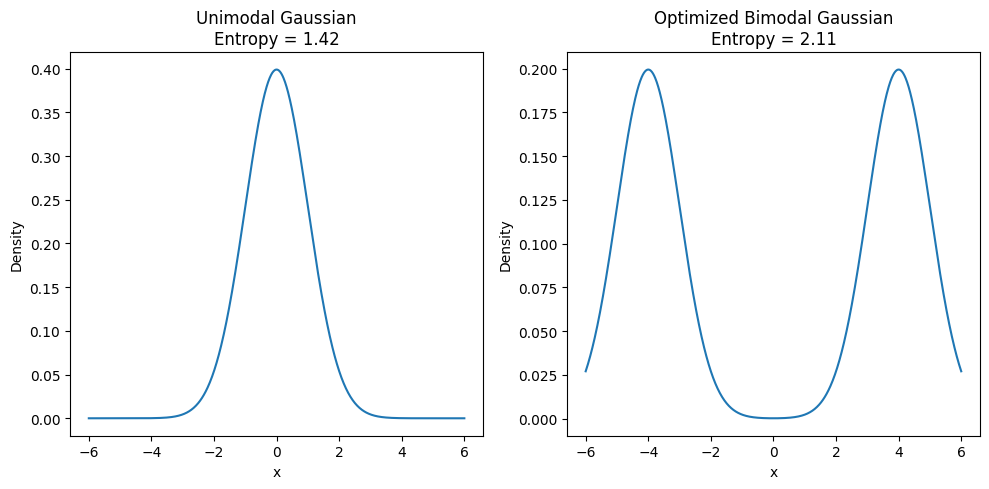

In [15]:
# Plot the unimodal Gaussian
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, gauss1)
plt.title(f"Unimodal Gaussian\nEntropy = {entropy1:.2f}")
plt.xlabel("x")
plt.ylabel("Density")

# Plot the optimized bimodal Gaussian
plt.subplot(1, 2, 2)
plt.plot(x, gauss_opt)
plt.title(f"Optimized Bimodal Gaussian\nEntropy = {entropy_opt:.2f}")
plt.xlabel("x")
plt.ylabel("Density")

plt.tight_layout()
plt.show()